In [16]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/datasets/Housing_1.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [54]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [55]:
for col in df.select_dtypes(include=["object"]).columns.to_list():
  print(df.groupby([col]).size().reset_index(name = "count"))

  mainroad  count
0       no     77
1      yes    468
  guestroom  count
0        no    448
1       yes     97
  basement  count
0       no    354
1      yes    191
  hotwaterheating  count
0              no    520
1             yes     25
  airconditioning  count
0              no    373
1             yes    172
  prefarea  count
0       no    417
1      yes    128
  furnishingstatus  count
0        furnished    140
1   semi-furnished    227
2      unfurnished    178


In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [59]:
enc = OrdinalEncoder()
df["mainroad"] = enc.fit_transform(df[["mainroad"]])
df["guestroom"] = enc.fit_transform(df[["guestroom"]])
df["basement"] = enc.fit_transform(df[["hotwaterheating"]])
df["airconditioning"] = enc.fit_transform(df[["airconditioning"]])
df["hotwaterheating"] = enc.fit_transform(df[["hotwaterheating"]])
df["prefarea"] = enc.fit_transform(df[["prefarea"]])

In [60]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,0.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,0.0,0.0,1.0,3,1.0,furnished
4,11410000,7420,4,1,2,1.0,1.0,0.0,0.0,1.0,2,0.0,furnished


In [61]:
rank = ["unfurnished", "semi-furnished", "furnished"]
oe = OrdinalEncoder(categories=[rank])
df["furnishingstatus"] = oe.fit_transform(df[["furnishingstatus"]])

In [62]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,0.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,0.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,0.0,0.0,1.0,2,0.0,2.0


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-110-1c5f23d9e890>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"], bins=50)


<Axes: xlabel='price', ylabel='Density'>

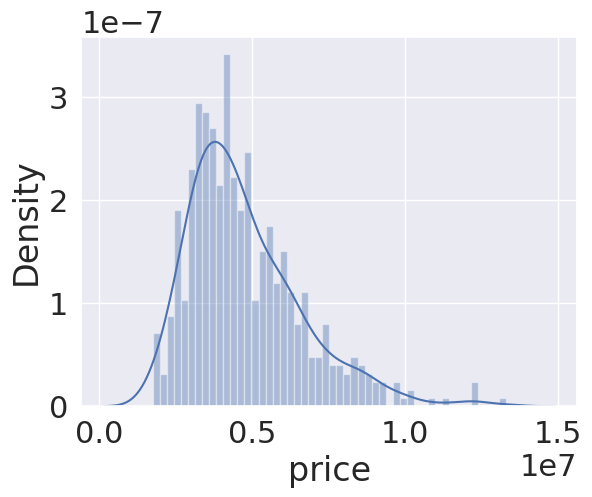

In [110]:
sns.distplot(df["price"], bins=50)

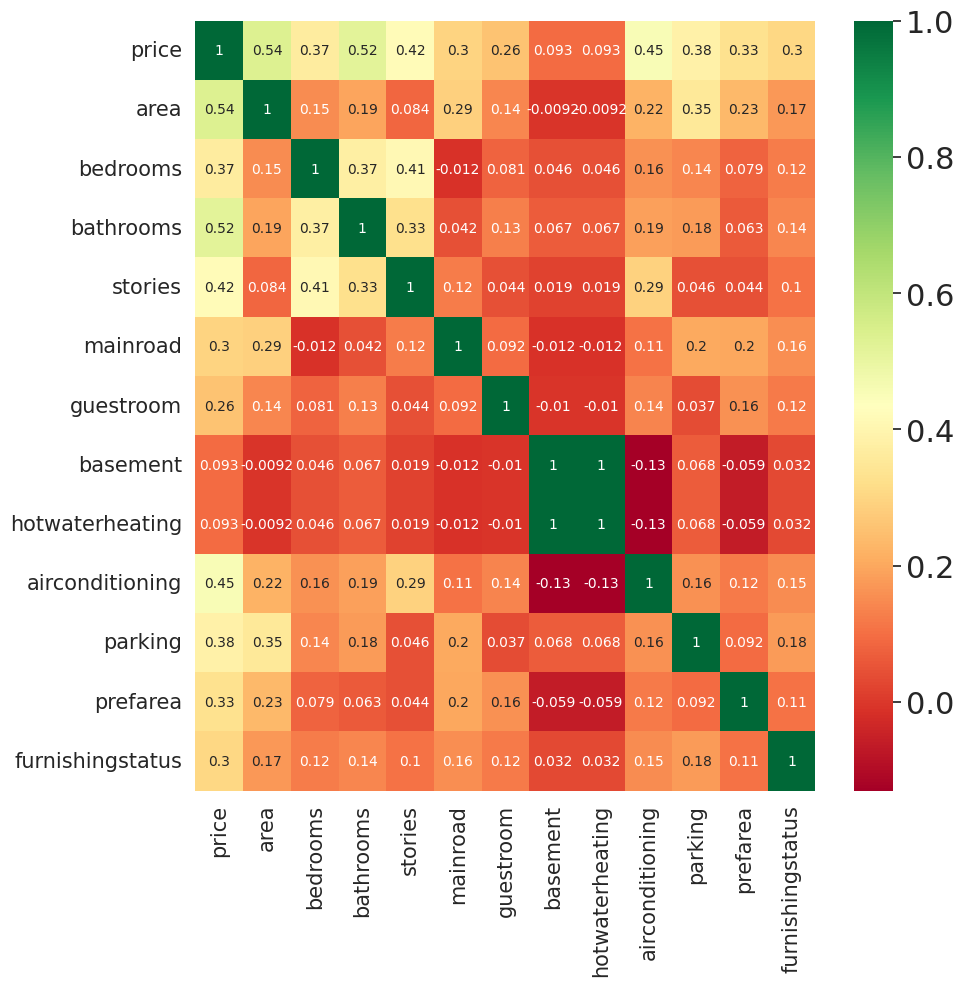

In [114]:
plt.subplots(figsize=(10, 10))
heat_plot = sns.heatmap(df.corr(method="pearson"), annot=True, cmap="RdYlGn", annot_kws={"size": 10})

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.show()

In [68]:
X = df.drop(["price"], axis = 1)
y = df["price"]

In [69]:
print(X.shape)
print(y.shape)

(545, 12)
(545,)


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [88]:
X_train

array([[0.35359712, 0.6       , 0.33333333, ..., 0.33333333, 0.        ,
        0.5       ],
       [0.22877698, 0.4       , 0.        , ..., 0.66666667, 1.        ,
        0.        ],
       [0.34820144, 0.4       , 0.        , ..., 0.66666667, 1.        ,
        1.        ],
       ...,
       [0.1294964 , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19496403, 0.6       , 0.66666667, ..., 0.66666667, 0.        ,
        0.5       ],
       [0.56978417, 0.4       , 0.        , ..., 0.66666667, 1.        ,
        1.        ]])

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [90]:
reg.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = reg.predict(X_test)

In [92]:
y_pred

array([5303094.96659503, 3088263.15890802, 2916699.94000168,
       3862017.90805121, 3686202.43591258, 4956643.7569755 ,
       4127847.74785641, 5780621.1135947 , 4237315.82438214,
       8594775.97274277, 3986249.09637162, 1985082.40847195,
       2805930.74082187, 3780731.44865365, 4215099.71155305,
       3891009.57823522, 5134100.93411802, 5946906.05075103,
       3984910.82120524, 5831435.05202259, 5130355.87485438,
       4491949.67080008, 3181457.99386949, 3178897.01188539,
       3203819.20369548, 4199672.86635332, 3650200.91114504,
       2675149.85886852, 7304653.23970622, 6270975.34567395,
       4931766.1338155 , 6386192.55465513, 6580834.20906098,
       7524851.43767372, 6158958.05125198, 7273541.34358071,
       3733065.3310122 , 4611133.83347094, 2994010.88766287,
       4899333.36304595, 3903644.58356486, 4343199.97423665,
       5555232.07269369, 3172471.38725381, 3355391.60634096,
       3432939.23567069, 4411970.3790458 , 6248793.8556835 ,
       3246594.57082503,

In [93]:
y_test

154    5530000
515    2450000
533    2100000
182    5145000
434    3290000
        ...   
88     6475000
483    2940000
269    4375000
342    3850000
196    4970000
Name: price, Length: 109, dtype: int64

In [94]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [95]:
R2 = r2_score(y_pred, y_test)
R2

0.49319918660549844

In [96]:
MSE = mean_squared_error(y_pred, y_test)
MSE

1233581561554.3787

In [97]:
RMSE = math.sqrt(MSE)
RMSE

1110667.1695671834

In [98]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

802551.1851278172

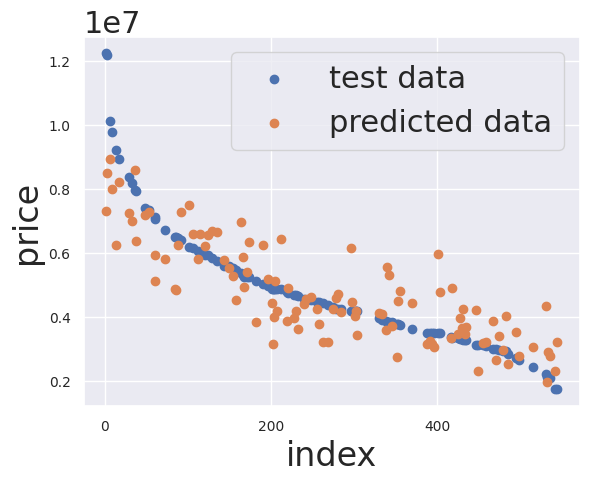

In [112]:
plt.scatter(y_test.index, y_test, label = "test data")
plt.scatter(y_test.index, y_pred, label = "predicted data")

plt.xlabel("index")
plt.ylabel("price")

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.legend()

plt.show()